# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Adult Income Prediction Project Solution</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

# WELCOME!

**Overview**

The data has been split into two groups:

- training set (train.csv)
- test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

**Data Dictionary**

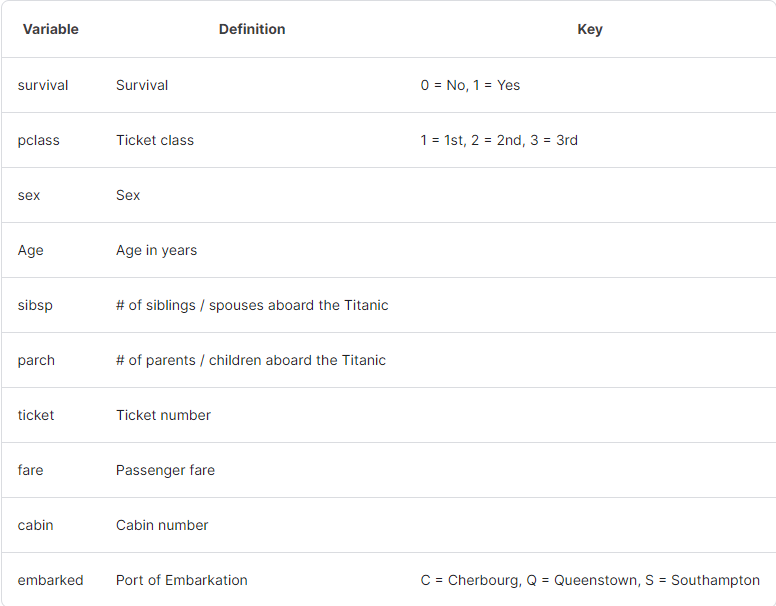

**Variable Notes**

pclass: A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

# Exploratory Data Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report,confusion_matrix
from sklearn.metrics import  recall_score, precision_score, roc_auc_score, auc
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  GridSearchCV
from yellowbrick.classifier import ClassPredictionError, ROCAUC
from sklearn.pipeline  import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from xgboost import XGBClassifier

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Load Dataset

In [2]:
# Load in the train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Store our passenger ID for easy access
test_ids = test['PassengerId']

## Feature Engineering 

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
train.describe(include="object").T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [9]:
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

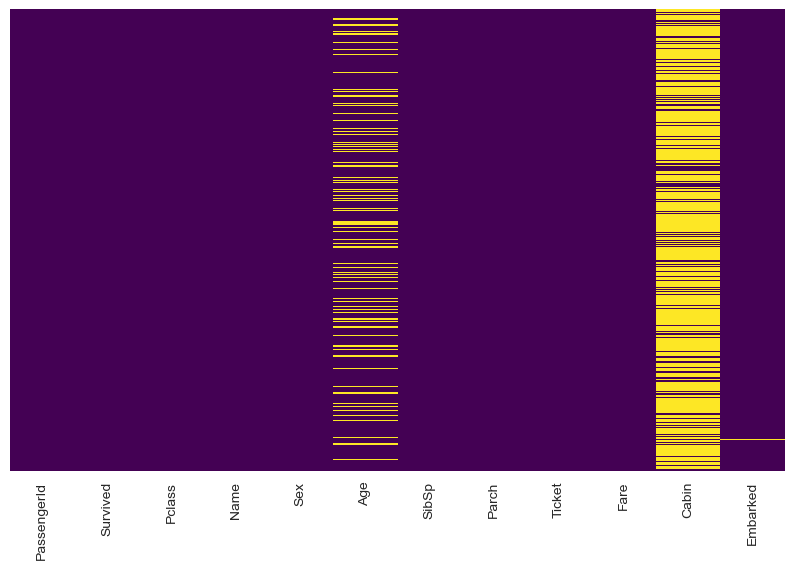

In [12]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

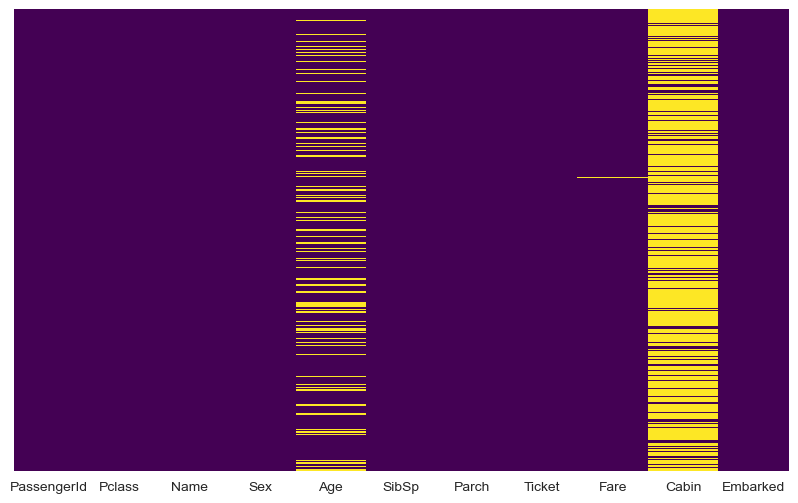

In [14]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [15]:
def dropping(data):
    data=data.drop(columns=['PassengerId', 'Ticket', 'Cabin'])
    data.Embarked.fillna('U', inplace=True)
    return data

In [16]:
train = dropping(train)
test= dropping(test)

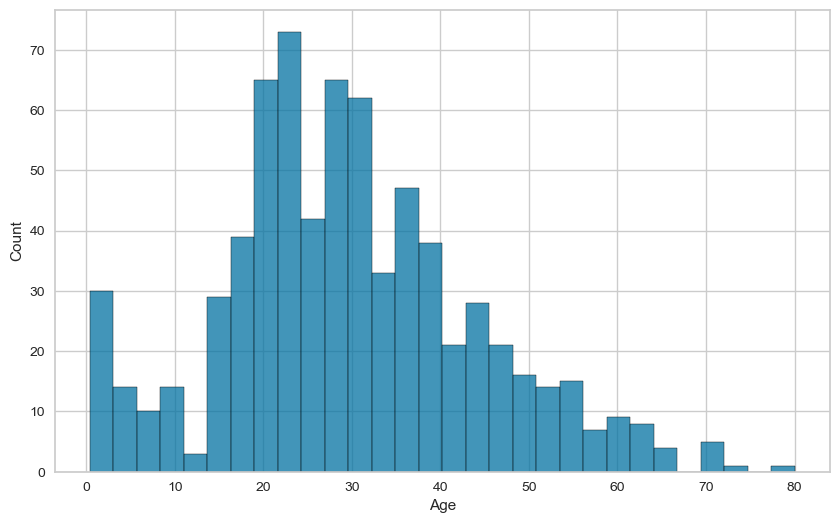

In [17]:
sns.histplot(data=train, x='Age', kde=False, bins=30);

In [18]:
train.groupby(['Pclass', 'Sex']).Age.median()

#yaşlıların birinci sınıfta olmayı tercih ettikleri ve sınıf kalitesi düştükçe yaşın ortalamasının da
# düştüğü şeklinde yorumlanabilir. 

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

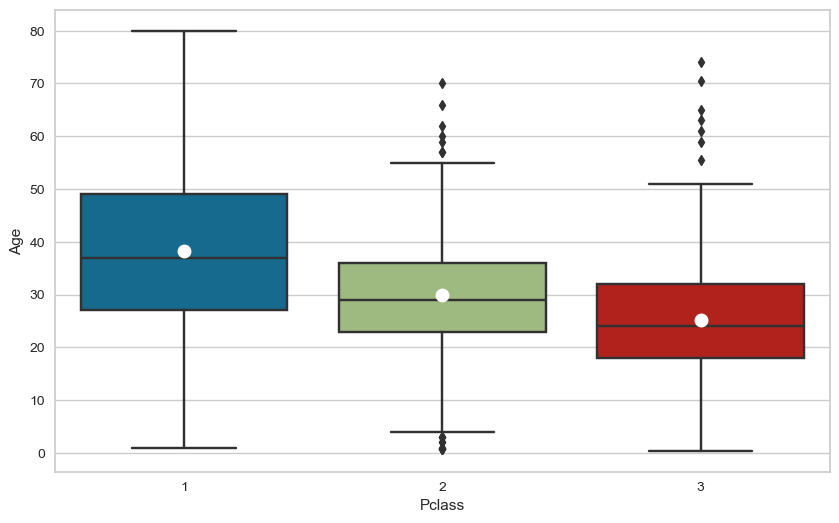

In [19]:
sns.boxplot(data=train, 
            x='Pclass', 
            y='Age', 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

In [20]:
# train.groupby(['Pclass', 'Sex']).Age.transform("median")

In [21]:
# train['Age'] = train['Age'].fillna(train.groupby(['Pclass', 'Sex']).Age.transform("median"))

In [22]:
# test['Age'] = test['Age'].fillna(test.groupby(['Pclass', 'Sex']).Age.transform("median"))

In [23]:
print(train[(train['Age'].isnull()) & (train['Sex']=='female')]['Name'].to_markdown())

# Yaş özelliğinde boş değerlere karşılık gelen tüm kadın isimlerini görelim
# Kadın yolcuların 'miss' mı yoksa 'mrs' mı olduğunu tespit edersek yaşları hakkında daha iyi tahminde bulunabiliriz.

|     | Name                                               |
|----:|:---------------------------------------------------|
|  19 | Masselmani, Mrs. Fatima                            |
|  28 | O'Dwyer, Miss. Ellen "Nellie"                      |
|  31 | Spencer, Mrs. William Augustus (Marie Eugenie)     |
|  32 | Glynn, Miss. Mary Agatha                           |
|  47 | O'Driscoll, Miss. Bridget                          |
|  82 | McDermott, Miss. Brigdet Delia                     |
| 109 | Moran, Miss. Bertha                                |
| 128 | Peter, Miss. Anna                                  |
| 140 | Boulos, Mrs. Joseph (Sultana)                      |
| 166 | Chibnall, Mrs. (Edith Martha Bowerman)             |
| 180 | Sage, Miss. Constance Gladys                       |
| 186 | O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)    |
| 198 | Madigan, Miss. Margaret "Maggie"                   |
| 229 | Lefebre, Miss. Mathilde                            |
| 235 | Harknett, Miss. 

In [24]:
def filling(data):
    data['Name']=data['Name'].apply(lambda x: 'Miss' if 'Miss.' in x else ('Mrs' if 'Mrs.' in x else 'Mr'))
    return data

# Ad sütununu üç değere sabitledim; Miss, Mrs ve Mr
# Bir sonraki adımda, Yaş sütununun Boş hücrelerini, hangi değere karşılık geliyorsa, ortalama yaş ile dolduracağım
# Ad sütunundaki o hücreye.

In [25]:
filling(train)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.00,1,0,7.2500,S
1,1,1,Mrs,female,38.00,1,0,71.2833,C
2,1,3,Miss,female,26.00,0,0,7.9250,S
3,1,1,Mrs,female,35.00,1,0,53.1000,S
4,0,3,Mr,male,35.00,0,0,8.0500,S
5,0,3,Mr,male,NaN,0,0,8.4583,Q
6,0,1,Mr,male,54.00,0,0,51.8625,S
7,0,3,Mr,male,2.00,3,1,21.0750,S
8,1,3,Mrs,female,27.00,0,2,11.1333,S
9,1,2,Mrs,female,14.00,1,0,30.0708,C


In [26]:
filling(test)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,Mr,male,34.50,0,0,7.8292,Q
1,3,Mrs,female,47.00,1,0,7.0000,S
2,2,Mr,male,62.00,0,0,9.6875,Q
3,3,Mr,male,27.00,0,0,8.6625,S
4,3,Mrs,female,22.00,1,1,12.2875,S
5,3,Mr,male,14.00,0,0,9.2250,S
6,3,Miss,female,30.00,0,0,7.6292,Q
7,2,Mr,male,26.00,1,1,29.0000,S
8,3,Mrs,female,18.00,0,0,7.2292,C
9,3,Mr,male,21.00,2,0,24.1500,S


In [27]:
train.loc[train['Age'].isnull()]['Name']

5        Mr
17       Mr
19      Mrs
26       Mr
28     Miss
29       Mr
31      Mrs
32     Miss
36       Mr
42       Mr
45       Mr
46       Mr
47     Miss
48       Mr
55       Mr
64       Mr
65       Mr
76       Mr
77       Mr
82     Miss
87       Mr
95       Mr
101      Mr
107      Mr
109    Miss
121      Mr
126      Mr
128    Miss
140     Mrs
154      Mr
158      Mr
159      Mr
166     Mrs
168      Mr
176      Mr
180    Miss
181      Mr
185      Mr
186     Mrs
196      Mr
198    Miss
201      Mr
214      Mr
223      Mr
229    Miss
235    Miss
240    Miss
241    Miss
250      Mr
256     Mrs
260      Mr
264    Miss
270      Mr
274    Miss
277      Mr
284      Mr
295      Mr
298      Mr
300    Miss
301      Mr
303    Miss
304      Mr
306    Miss
324      Mr
330    Miss
334     Mrs
335      Mr
347     Mrs
351      Mr
354      Mr
358    Miss
359    Miss
364      Mr
367     Mrs
368    Miss
375     Mrs
384      Mr
388      Mr
409    Miss
410      Mr
411      Mr
413      Mr
415     Mrs
420 

In [28]:
train.loc[train['Name']=='Miss']['Age'].mean()

21.773972602739725

In [29]:
train.loc[train['Name']=='Mrs']['Age'].mean()

35.898148148148145

In [30]:
train.loc[train['Name']=='Mr']['Age'].mean()

30.759065217391303

In [31]:
def filling2(data):
    a=['Miss', 'Mrs', 'Mr']
    b =[22, 36, 31]
    for i, k in zip(a,b):
        data.loc[data['Name']==i, 'Age'] = data.loc[data['Name']==i]['Age'].fillna(k)
    return data
        
filling2(train)
filling2(test)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,Mr,male,34.50,0,0,7.8292,Q
1,3,Mrs,female,47.00,1,0,7.0000,S
2,2,Mr,male,62.00,0,0,9.6875,Q
3,3,Mr,male,27.00,0,0,8.6625,S
4,3,Mrs,female,22.00,1,1,12.2875,S
5,3,Mr,male,14.00,0,0,9.2250,S
6,3,Miss,female,30.00,0,0,7.6292,Q
7,2,Mr,male,26.00,1,1,29.0000,S
8,3,Mrs,female,18.00,0,0,7.2292,C
9,3,Mr,male,21.00,2,0,24.1500,S


In [32]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [34]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [35]:
train.drop(columns='Name', inplace=True)
test.drop(columns='Name', inplace=True)

# Artık her iki veri kümesinden de ad sütununu bırakabilirim.

In [36]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [37]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [38]:
train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [39]:
gender_submission=pd.read_csv("gender_submission.csv")
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Encoding

Tree based modellerle ilgili yapılan akademik bir çalışmada;

1. Ordinal encoder scorlarının one hot encoder scorlarına göre ortalama %1, %2 civarlarında daha iyi olduğu,

2. eğitim esnasında ordinal encoderın, one hot encodera göre 2,5 kat daha hızlı çalıştığı,

3. Doğru feature importance elde edebilmek için Ordinal encoder kullanılması gerektiği görülmüştür.

Tree based modellerde amacımız sadece skor almak ise hem one hot encoder hem de ordinal encoder kullanabiliriz. 

Ancak, yukarıda bahsettiğimiz avantajlarından dolayı tree based modellerde ordinal encoder kullanacağız.

Eğer amacınız sadece skor almaksa ordinal encoder veya one hot encoder kullanabileceğimiz söylemiştik. Ancak kesinlikle

get_dummies fonksiyonunu kullanarak gözlemleri dummies featurlara (one hot encoder) dönüştürmüyoruz. Çünkü get_dummies 

fonksiyonu data leakage sorununa yol açar. get_dummies yerine her zaman one hot encoder kullanmamız gerektiğini unutmuyoruz.

In [40]:
cols=['Sex', 'Embarked']
enc1=OrdinalEncoder(categories=[['female', 'male']])
enc2=OrdinalEncoder(categories=[['S','C','Q','U']])
enc = [enc1, enc2]
for i, k in zip(cols, enc):
    train[i]=k.fit_transform(train[[i]])
    test[i]=k.transform(test[[i]])

In [41]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,0.0
1,1,1,0.0,38.0,1,0,71.2833,1.0
2,1,3,0.0,26.0,0,0,7.9250,0.0
3,1,1,0.0,35.0,1,0,53.1000,0.0
4,0,3,1.0,35.0,0,0,8.0500,0.0


In [42]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,34.5,0,0,7.8292,2.0
1,3,0.0,47.0,1,0,7.0000,0.0
2,2,1.0,62.0,0,0,9.6875,2.0
3,3,1.0,27.0,0,0,8.6625,0.0
4,3,0.0,22.0,1,1,12.2875,0.0


# Train | Test Split

In [43]:
X = train.drop(columns='Survived')
y = train['Survived']

In [44]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=101)

# Implement AdaBoost

In [45]:
ada = AdaBoostClassifier(random_state=101)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=101)

In [46]:
prediction=ada.predict(X_test)
accuracy_score(y_test, prediction)

0.7932960893854749

## GridSearchCV

In [47]:
param_grid = {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

ada_model = AdaBoostClassifier()
ada_grid = GridSearchCV(ada_model, param_grid, scoring = "accuracy", verbose=2, n_jobs = -1, 
                        return_train_score=True)
ada_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [48]:
ada_grid.best_params_

{'learning_rate': 0.2, 'n_estimators': 200}

In [49]:
ada_grid.best_score_

0.8090219639515415

In [50]:
y_pred_test = ada_grid.predict(X_test)
y_pred_train = ada_grid.predict(X_train)

In [51]:
ada_accuracy_test = accuracy_score(y_test, y_pred_test)
ada_accuracy_train = accuracy_score(y_train, y_pred_train)

ada_f1_test = f1_score(y_test, y_pred_test)
ada_f1_train = f1_score(y_train, y_pred_train)

ada_accuracy_test, ada_accuracy_train, ada_f1_test, ada_f1_train

(0.7932960893854749,
 0.8286516853932584,
 0.7482993197278912,
 0.7635658914728682)

In [52]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train))

TEST CM
 [[87 12]
 [25 55]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[393  57]
 [ 65 197]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TEST REPORT 
               precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.82      0.69      0.75        80

    accuracy                           0.79       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.79      0.79       179

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       450
           1       0.78      0.75      0.76       262

    accuracy                           0.83       712
   macro avg       0.82      0.81      0.81       712
weighted avg       0.83      0.83      0.83       712



## Prediction with Best Hyper Parameters

In [53]:
ada_test=GradientBoostingClassifier(
 learning_rate= 0.2,
 n_estimators= 200)

ada_test.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=200)

In [54]:
sub_pred1=ada_test.predict(test)
accuracy_score(gender_submission.Survived.values, sub_pred1)

0.8516746411483254

## Feature importances

In [55]:
model = AdaBoostClassifier(n_estimators=200, learning_rate=0.2, random_state=101)
model.fit(X_train, y_train)
model.feature_importances_

feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance")
ada_imp_feats

,ada_importance
Embarked,0.035
Parch,0.040
Pclass,0.055
SibSp,0.085
Sex,0.100
Age,0.280
Fare,0.405


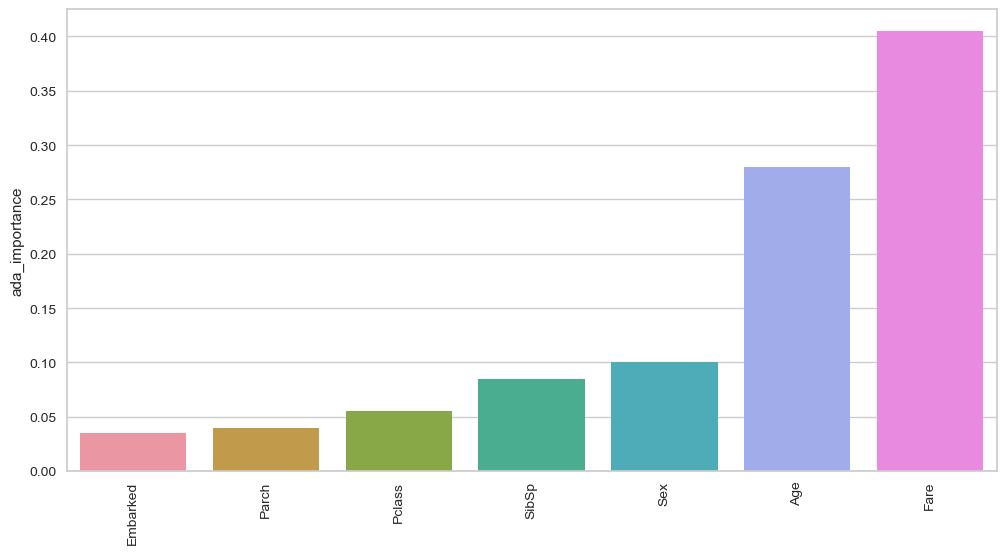

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_imp_feats ,x=ada_imp_feats.index, y='ada_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves, Precision Recall Curve

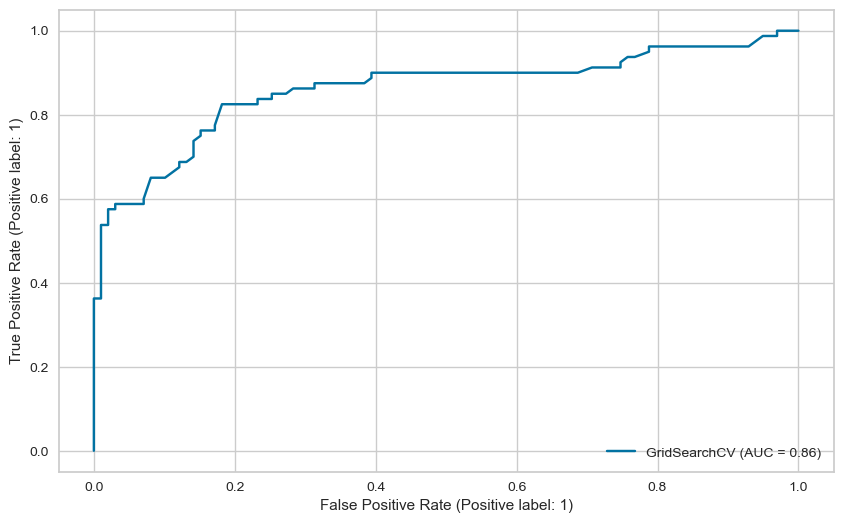

In [57]:
RocCurveDisplay.from_estimator(ada_grid, X_test, y_test);

In [58]:
ada_auc = roc_auc_score(y_test, y_pred_test)
ada_auc

0.7831439393939393

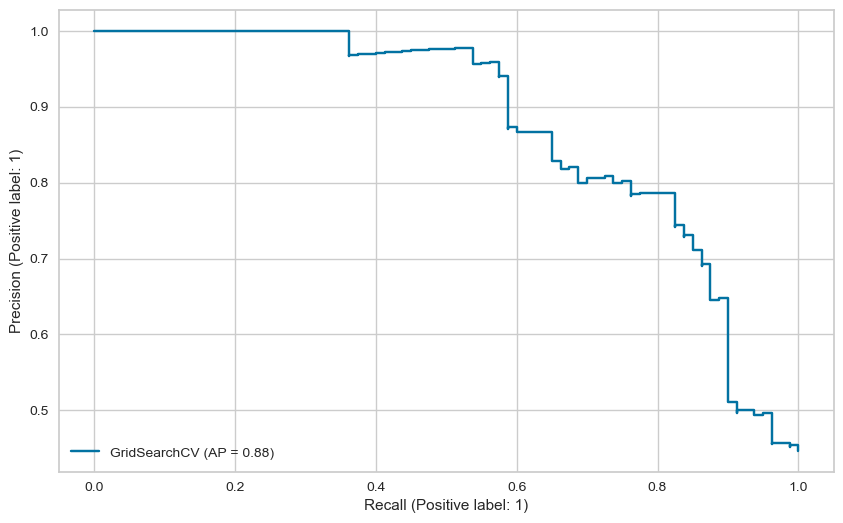

In [59]:
PrecisionRecallDisplay.from_estimator(ada_grid, X_test, y_test);

In [60]:
from sklearn.metrics import precision_recall_curve, auc

In [61]:
# ada_grid, X_test ve y_test, plot_precision_recall_curve fonksiyonunda kullanılan verilerdir
# y_pred_proba, sınıflandırıcının pozitif sınıf için tahmin edilen olasılık değerleridir
y_pred_proba = ada_grid.predict_proba(X_test)[:, 1]

precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)

# Precision-recall eğrisinin altındaki alanı (AUC-PR) hesaplar
ada_prc = auc(recall, precision)
ada_prc

0.8754786801449447

# GradientBoosting

In [62]:
grb = GradientBoostingClassifier(random_state=101)
grb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=101)

In [63]:
prediction=grb.predict(X_test)
accuracy_score(y_test, prediction)

0.8324022346368715

## GridSearchCV

In [64]:
param_grid = {"n_estimators":[100, 200], "subsample":[0.5, 1], "max_features" : [None, 2, 3], "learning_rate": [0.001, 0.01], 'max_depth':[3,4,5]}

grb_model = GradientBoostingClassifier()
grb_grid = GridSearchCV(grb_model, param_grid, scoring = "accuracy", verbose=2, n_jobs = -1, 
                        return_train_score=True)
grb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01], 'max_depth': [3, 4, 5],
                         'max_features': [None, 2, 3],
                         'n_estimators': [100, 200], 'subsample': [0.5, 1]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [65]:
grb_grid.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'max_features': 2,
 'n_estimators': 200,
 'subsample': 1}

In [66]:
grb_grid.best_score_

0.8300797793755539

In [67]:
y_pred_test = grb_grid.predict(X_test)
y_pred_train = grb_grid.predict(X_train)

In [68]:
grb_accuracy_test = accuracy_score(y_test, y_pred_test)
grb_accuracy_train = accuracy_score(y_train, y_pred_train)

grb_f1_test = f1_score(y_test, y_pred_test)
grb_f1_train = f1_score(y_train, y_pred_train)

grb_accuracy_test, grb_accuracy_train, grb_f1_test, grb_f1_train

(0.8156424581005587,
 0.8384831460674157,
 0.7480916030534351,
 0.7438752783964366)

In [69]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train))

TEST CM
 [[97  2]
 [31 49]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[430  20]
 [ 95 167]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TEST REPORT 
               precision    recall  f1-score   support

           0       0.76      0.98      0.85        99
           1       0.96      0.61      0.75        80

    accuracy                           0.82       179
   macro avg       0.86      0.80      0.80       179
weighted avg       0.85      0.82      0.81       179

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           0       0.82      0.96      0.88       450
           1       0.89      0.64      0.74       262

    accuracy                           0.84       712
   macro avg       0.86      0.80      0.81       712
weighted avg       0.85      0.84      0.83       712



## Prediction with Best Hyper Parameters

In [70]:
grb_f=GradientBoostingClassifier(
 learning_rate= 0.01,
 max_depth= 4,
 n_estimators= 200,
 max_features= 3,
 subsample= 1)
grb_f.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features=3,
                           n_estimators=200, subsample=1)

In [71]:
sub_pred2=grb_f.predict(test)
accuracy_score(gender_submission.Survived.values, sub_pred2)

0.8995215311004785

## Feature importances

In [72]:
model = GradientBoostingClassifier(
 learning_rate= 0.01,
 max_depth= 4,
 n_estimators= 200,
 max_features= 3,
 subsample= 1,
 random_state=101)

grb_f.fit(X_train,y_train)

model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance")
grad_imp_feats

,grad_importance
Parch,0.015322
Embarked,0.018785
SibSp,0.046293
Age,0.126651
Fare,0.153416
Pclass,0.154036
Sex,0.485498


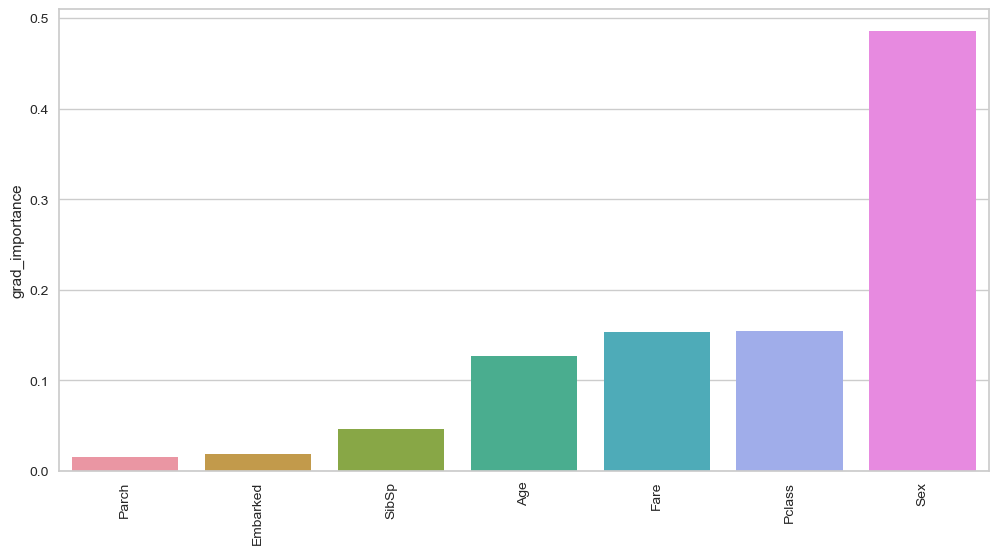

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves and AUC

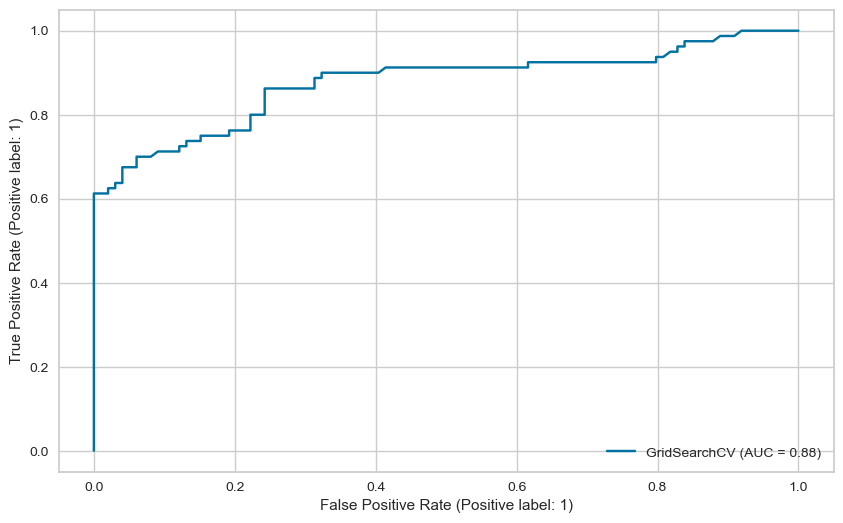

In [74]:
RocCurveDisplay.from_estimator(grb_grid, X_test, y_test);

In [75]:
grb_auc = roc_auc_score(y_test, y_pred_test)
grb_auc

0.7961489898989899

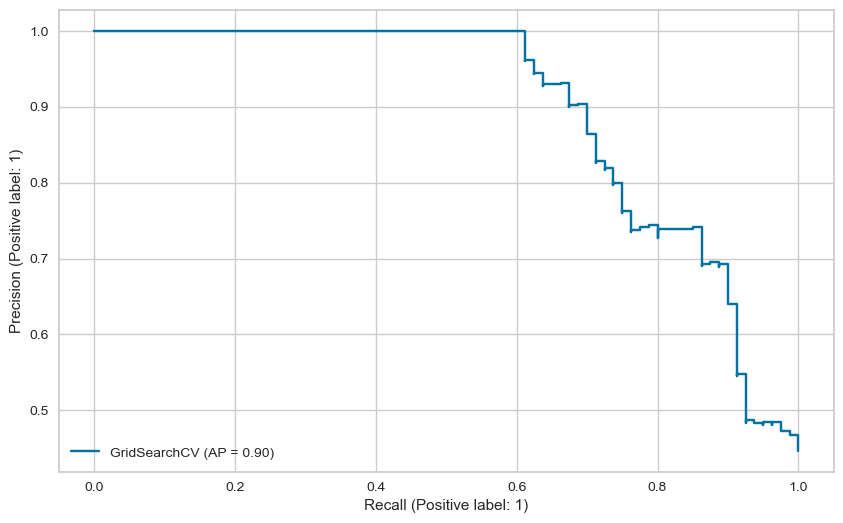

In [76]:
PrecisionRecallDisplay.from_estimator(grb_grid, X_test, y_test);

In [77]:
# ada_grid, X_test ve y_test, plot_precision_recall_curve fonksiyonunda kullanılan verilerdir
# y_pred_proba, sınıflandırıcının pozitif sınıf için tahmin edilen olasılık değerleridir
y_pred_proba = grb_grid.predict_proba(X_test)[:, 1]

precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)

# Precision-recall eğrisinin altındaki alanı (AUC-PR) hesaplar
grb_prc = auc(recall, precision)
grb_prc

0.8950355208458178

# XGBoost

In [78]:
xgb = XGBClassifier(random_state=101)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=101, ...)

In [79]:
prediction=xgb.predict(X_test)
accuracy_score(y_test, prediction)

0.7877094972067039

## GridSearchCV

In [80]:
param_grid = {"booster":['dart','gbtree'],"eta":[0.1,0.2],"n_estimators":[100,200],'max_depth':[3], "learning_rate": [0.1],
             "subsample":[0.5], "colsample_bytree":[0.5], 'reg_alpha':[0,1]}

xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "accuracy", verbose=2, n_jobs = -1, 
                        return_train_score=True)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['dart', 'gbtree'],
                         'colsample_bytree': [0.5], 'eta': [0.1, 0.2],
                         'learning_rate': [0.1], 'max_depth': [3],
                         'n_estimators': [100, 200], 'reg_alpha': [0, 1],
                         'subsample': [0.5]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [81]:
xgb_grid.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.5,
 'eta': 0.1,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200,
 'reg_alpha': 0,
 'subsample': 0.5}

In [82]:
xgb_grid.best_score_

0.8188318723529993

In [83]:
y_pred_test = xgb_grid.predict(X_test)
y_pred_train = xgb_grid.predict(X_train)

In [84]:
xgb_accuracy_test = accuracy_score(y_test, y_pred_test)
xgb_accuracy_train = accuracy_score(y_train, y_pred_train)

xgb_f1_test = f1_score(y_test, y_pred_test)
xgb_f1_train = f1_score(y_train, y_pred_train)

xgb_accuracy_test, xgb_accuracy_train, xgb_f1_test, xgb_f1_train

(0.8268156424581006,
 0.8806179775280899,
 0.7769784172661871,
 0.8282828282828283)

In [85]:
print("TEST CM\n" , confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train))

TEST CM
 [[94  5]
 [26 54]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[422  28]
 [ 57 205]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TEST REPORT 
               precision    recall  f1-score   support

           0       0.78      0.95      0.86        99
           1       0.92      0.68      0.78        80

    accuracy                           0.83       179
   macro avg       0.85      0.81      0.82       179
weighted avg       0.84      0.83      0.82       179

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       450
           1       0.88      0.78      0.83       262

    accuracy                           0.88       712
   macro avg       0.88      0.86      0.87       712
weighted avg       0.88      0.88      0.88       712



## Prediction with Best Hyper Parameters

In [86]:
xgb_test=XGBClassifier(booster='gbtree',
 eta=0.1,
 colsample_bytree= 0.5,
 learning_rate= 0.1,
 max_depth= 3,
 n_estimators= 200,
 reg_alpha= 0,
 subsample= 0.5)
xgb_test.fit(X_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [87]:
sub_pred3=xgb_test.predict(test)
accuracy_score(gender_submission.Survived.values, sub_pred3)

0.8732057416267942

## Feature importances

In [88]:
model = XGBClassifier(booster='gbtree',
 eta=0.1,
 colsample_bytree= 0.5,
 learning_rate= 0.1,
 max_depth= 3,
 n_estimators= 200,
 reg_alpha= 0,
 subsample= 0.5,
 random_state=101)

model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

,xgb_importance
Parch,0.058016
Embarked,0.065052
SibSp,0.080658
Age,0.123842
Fare,0.128635
Pclass,0.160735
Sex,0.383063


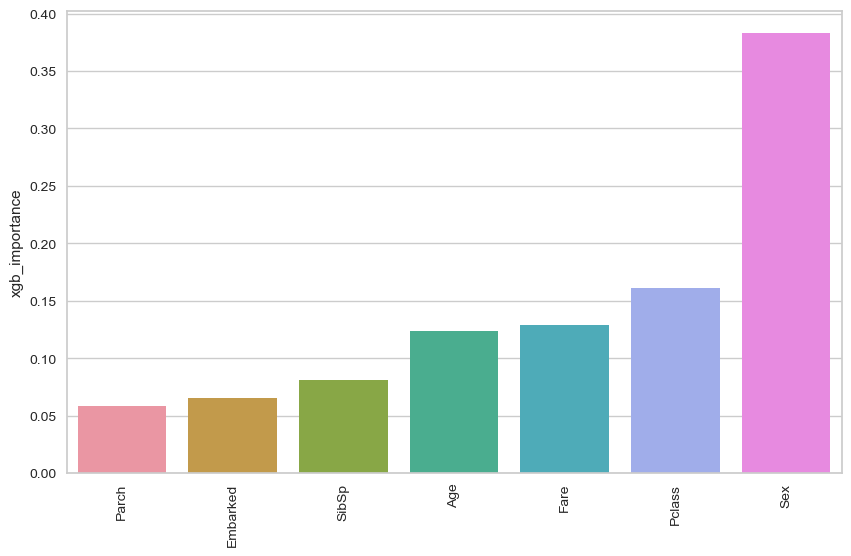

In [89]:
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')

plt.xticks(rotation=90);

## Feature importance comparison

In [90]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

,ada_importance,grad_importance,xgb_importance
Embarked,0.035,0.018785,0.065052
Parch,0.040,0.015322,0.058016
Pclass,0.055,0.154036,0.160735
SibSp,0.085,0.046293,0.080658
Sex,0.100,0.485498,0.383063
Age,0.280,0.126651,0.123842
Fare,0.405,0.153416,0.128635


## Evaluating ROC Curves and AUC

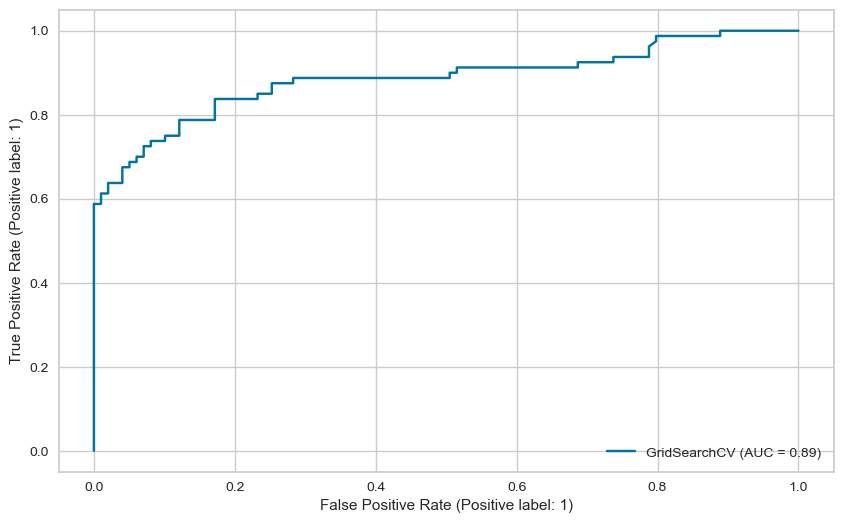

In [91]:
RocCurveDisplay.from_estimator(xgb_grid, X_test, y_test);

In [92]:
xgb_auc = roc_auc_score(y_test, y_pred_test)
xgb_auc

0.8122474747474748

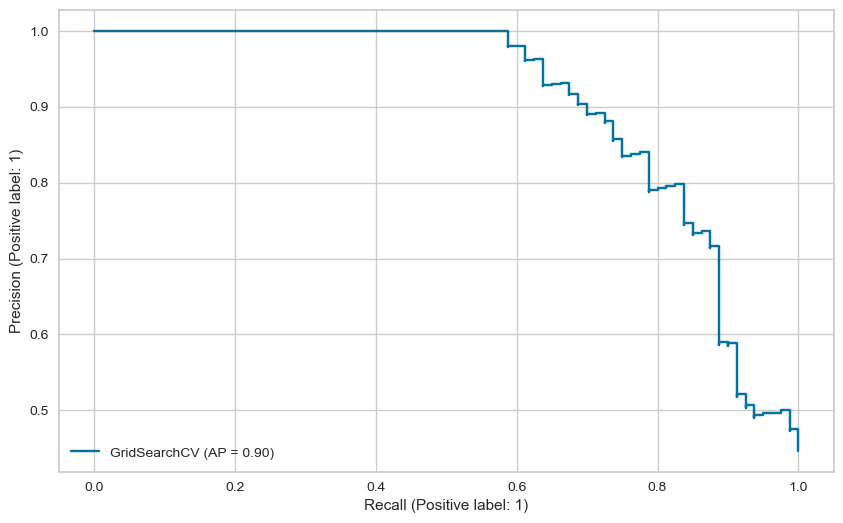

In [93]:
PrecisionRecallDisplay.from_estimator(xgb_grid, X_test, y_test);

In [94]:
# ada_grid, X_test ve y_test, plot_precision_recall_curve fonksiyonunda kullanılan verilerdir
# y_pred_proba, sınıflandırıcının pozitif sınıf için tahmin edilen olasılık değerleridir
y_pred_proba = xgb_grid.predict_proba(X_test)[:, 1]

precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)

# Precision-recall eğrisinin altındaki alanı (AUC-PR) hesaplar
xgb_prc = auc(recall, precision)
xgb_prc

0.9034041977421042

# Compare The Models

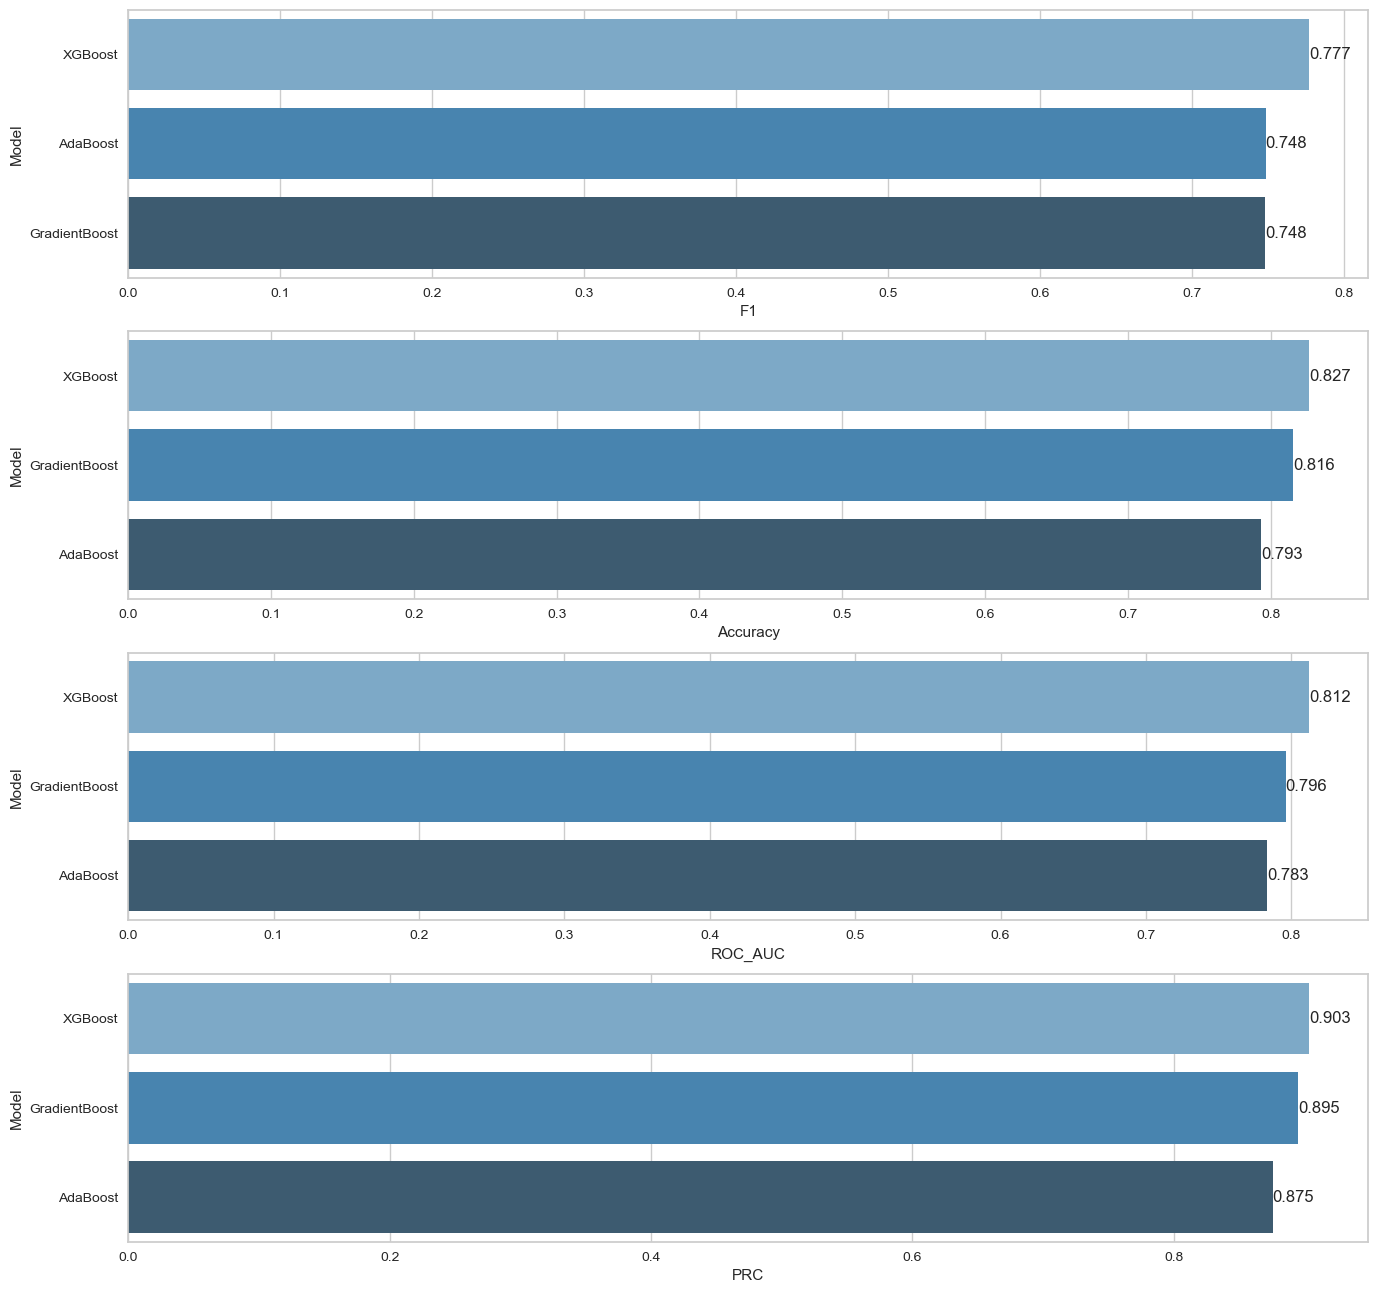

In [95]:
compare = pd.DataFrame({"Model": ["AdaBoost", "GradientBoost", "XGBoost"],
                        "Accuracy": [ada_accuracy_test, grb_accuracy_test, xgb_accuracy_test],
                        "F1": [ada_f1_test, grb_f1_test, xgb_f1_test],
                        "ROC_AUC": [ada_auc, grb_auc, xgb_auc],
                        "PRC": [ada_prc, grb_prc, xgb_prc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(16,16))

plt.subplot(411)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="PRC", ascending=False)
ax=sns.barplot(x="PRC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.show()

# LightGBM 

In [97]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 2.0 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.4 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [98]:
from lightgbm import LGBMClassifier

In [99]:
# LightGBM modelini oluşturma ve eğitme
lgbm = LGBMClassifier(random_state=101)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 262, number of negative: 450
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367978 -> initscore=-0.540903
[LightGBM] [Info] Start training from score -0.540903
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=101)

In [100]:
# Tahmin ve doğruluk hesaplama
prediction = lgbm.predict(X_test)
accuracy_score(y_test, prediction)

0.8100558659217877

In [102]:
#Hyperparameter grid tanımlama
param_grid = {
    "boosting_type": ['dart', 'gbtree'],
    "learning_rate": [0.1, 0.2],
    "n_estimators": [100, 200],
    'max_depth': [3],
    "subsample": [0.5],
    "colsample_bytree": [0.5],
    'reg_alpha': [0, 1]
}

In [103]:
# GridSearchCV ile en iyi parametrelerin bulunması
lgbm_model = LGBMClassifier()
lgbm_grid = GridSearchCV(lgbm_model, param_grid, scoring="accuracy", verbose=2, n_jobs=-1, return_train_score=True)
lgbm_grid.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[LightGBM] [Info] Number of positive: 262, number of negative: 450
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367978 -> initscore=-0.540903
[LightGBM] [Info] Start training from score -0.540903
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

GridSearchCV(estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'boosting_type': ['dart', 'gbtree'],
                         'colsample_bytree': [0.5], 'learning_rate': [0.1, 0.2],
                         'max_depth': [3], 'n_estimators': [100, 200],
                         'reg_alpha': [0, 1], 'subsample': [0.5]},
             return_train_score=True, scoring='accuracy', verbose=2)

In [104]:
# En iyi parametrelerin ve skorlara ulaşma
lgbm_grid.best_params_

{'boosting_type': 'dart',
 'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 100,
 'reg_alpha': 0,
 'subsample': 0.5}

In [105]:
lgbm_grid.best_score_

0.8286417807544568

In [106]:
# Test ve Train setlerinde tahmin yapma
y_pred_test = lgbm_grid.predict(X_test)
y_pred_train = lgbm_grid.predict(X_train)

In [107]:
# Accuracy ve F1 score hesaplama
lgbm_accuracy_test = accuracy_score(y_test, y_pred_test)
lgbm_accuracy_train = accuracy_score(y_train, y_pred_train)

In [108]:
lgbm_f1_test = f1_score(y_test, y_pred_test)
lgbm_f1_train = f1_score(y_train, y_pred_train)

In [109]:
lgbm_accuracy_test, lgbm_accuracy_train, lgbm_f1_test, lgbm_f1_train

(0.8100558659217877,
 0.8637640449438202,
 0.7536231884057972,
 0.7966457023060796)

In [110]:
# Confusion Matrix ve Classification Report
print("TEST CM\n", confusion_matrix(y_test, y_pred_test))
print("-*"*30)
print("TRAIN CM \n", confusion_matrix(y_train, y_pred_train))
print("-*"*30)
print("TEST REPORT \n", classification_report(y_test, y_pred_test))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train))

TEST CM
 [[93  6]
 [28 52]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN CM 
 [[425  25]
 [ 72 190]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TEST REPORT 
               precision    recall  f1-score   support

           0       0.77      0.94      0.85        99
           1       0.90      0.65      0.75        80

    accuracy                           0.81       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.83      0.81      0.80       179

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       450
           1       0.88      0.73      0.80       262

    accuracy                           0.86       712
   macro avg       0.87      0.83      0.85       712
weighted avg       0.87      0.86      0.86       712



In [114]:
# En iyi model ile test setinde tahmin yapma
lgbm_test = LGBMClassifier(
    boosting_type='dart',
    learning_rate=0.2,
    colsample_bytree=0.5,
    max_depth=3,
    n_estimators=100,
    reg_alpha=0,
    subsample=0.5,
    random_state=101
)
lgbm_test.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 262, number of negative: 450
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367978 -> initscore=-0.540903
[LightGBM] [Info] Start training from score -0.540903
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(boosting_type='dart', colsample_bytree=0.5, learning_rate=0.2,
               max_depth=3, random_state=101, reg_alpha=0, subsample=0.5)

In [115]:
# Test setindeki tahminlerin doğruluğunu kontrol etme
sub_pred3 = lgbm_test.predict(test)
accuracy_score(gender_submission.Survived.values, sub_pred3)

0.8923444976076556

In [118]:
# Modelin feature importance'ını elde etme
model = LGBMClassifier(
    boosting_type='dart',
    learning_rate=0.2,
    colsample_bytree=0.5,
    max_depth=3,
    n_estimators=100,
    reg_alpha=0,
    subsample=0.5,
    random_state=101
)

In [119]:
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 262, number of negative: 450
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.367978 -> initscore=-0.540903
[LightGBM] [Info] Start training from score -0.540903
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(boosting_type='dart', colsample_bytree=0.5, learning_rate=0.2,
               max_depth=3, random_state=101, reg_alpha=0, subsample=0.5)

In [120]:
model.feature_importances_

array([ 73,  50, 147,  49,  21, 182,  45])

LightGBM'ın feature_importances_ özelliği, modelin her bir özelliğe verdiği toplam önem puanlarını döndürür. Bu puanlar, genellikle özelliklerin belirli bir ölçüt (örneğin, bilgi kazancı) üzerinden hesaplanan ham önem değerleridir. Bu nedenle, doğrudan yüzdelik bir değer olarak gösterilmezler.

In [121]:
feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['lgbm_importance'])
lgbm_imp_feats = feats.sort_values("lgbm_importance")
lgbm_imp_feats

,lgbm_importance
Parch,21
Embarked,45
SibSp,49
Sex,50
Pclass,73
Age,147
Fare,182


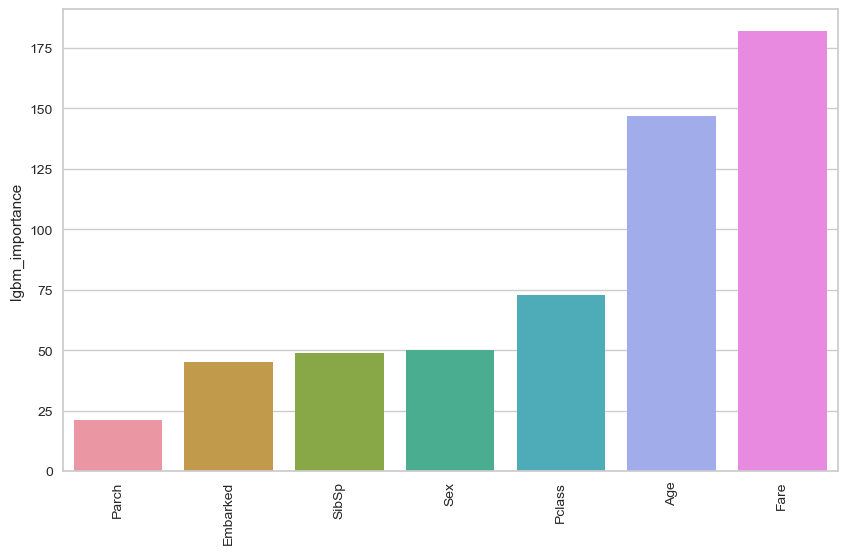

In [122]:
# Feature importance'ların görselleştirilmesi
sns.barplot(data=lgbm_imp_feats, x=lgbm_imp_feats.index, y='lgbm_importance')

plt.xticks(rotation=90)
plt.show()

In [123]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats,lgbm_imp_feats], axis=1)

,ada_importance,grad_importance,xgb_importance,lgbm_importance
Embarked,0.035,0.018785,0.065052,45
Parch,0.040,0.015322,0.058016,21
Pclass,0.055,0.154036,0.160735,73
SibSp,0.085,0.046293,0.080658,49
Sex,0.100,0.485498,0.383063,50
Age,0.280,0.126651,0.123842,147
Fare,0.405,0.153416,0.128635,182


# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Faydalı Olması Temennisiyle Teşekkürler</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |